# ЗАДАНИЕ 4. МОДЕЛИРОВАНИЕ ТРЕНДА НА ОСНОВЕ КРИВЫХ РОСТА

In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from math import sqrt
from pandas import concat
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [3]:
data = pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


In [4]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [5]:
data={"Date": dates, "Value": val}

In [6]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,26.45
1,2007-02-01,23.89
2,2007-03-01,25.95
3,2007-04-01,30.03
4,2007-05-01,28.96


In [7]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [9]:
my_data.Value=my_data.Value.astype(float)

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [11]:
series=my_data.squeeze()
type(series)

pandas.core.series.Series

In [12]:
y = series.values

In [13]:
t = np.arange(1, len(y) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

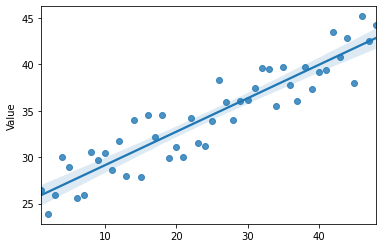

In [14]:
sns.regplot(x=t, y="Value", data=my_data);

In [15]:
# calculate a train-test split of a time series dataset
y = series.values
train_size = int(len(y) * 0.8)
y_train, y_test = y[0:train_size], y[train_size:len(y)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_train)))
print('Testing Observations: %d' % (len(y_test)))

Observations: 48
Training Observations: 38
Testing Observations: 10


In [16]:
conda info


     active environment : base
    active env location : C:\Users\HP\Anaconda3
            shell level : 1
       user config file : C:\Users\HP\.condarc
 populated config files : C:\Users\HP\.condarc
          conda version : 4.9.2
    conda-build version : 3.18.9
         python version : 3.7.4.final.0
       virtual packages : __cuda=11.2=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\HP\Anaconda3  (writable)
           channel URLs : https://conda.anaconda.org/conda-forge/win-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          h

In [17]:
t_train = np.arange(1, len(y_train) + 1)
t_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [18]:
# Найдем коэффициенты уравнения тренда
coef = np.polyfit(t_train, y_train, deg = 1)
coef

array([ 0.35096728, 25.69587482])

In [19]:
t_test = np.arange(len(y_train)+1,len(y)+1)
t_test

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [20]:
# Найдем расчетные значения по уравнению тренда для тестового набора
y_pred = coef[0] * t_test + coef[1]
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

In [21]:
R2 = r2_score(y_test, y_pred)
print('R2: %f' % R2)

R2: 0.351750


In [22]:
coef=linregress(t_train, y_train)
coef

LinregressResult(slope=0.3509672830725461, intercept=25.69587482219062, rvalue=0.8844672231847377, pvalue=1.790821115944336e-13, stderr=0.030858907019685272, intercept_stderr=0.6903710649324863)

In [23]:
# Найдем расчетные значения по уравнению тренда для тестового набора
y_pred = coef[0] * t_test + coef[1]
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

In [24]:
R2 = r2_score(y_test, y_pred)
print('R2: %f' % R2)

R2: 0.351750


In [25]:
t_train=t_train.reshape(-1,1)

In [26]:
model = LinearRegression().fit(t_train, y_train)
model

LinearRegression()

In [27]:
model.coef_

array([0.35096728])

In [28]:
model.intercept_

25.695874822190618

In [29]:
t_test=t_test.reshape(-1,1)

In [30]:
# Расчетные значения по модели
y_pred = model.predict(t_test) 
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

In [31]:
R2 = r2_score(y_test, y_pred)
print('R2: %f' % R2)

R2: 0.351750


In [32]:
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % MAE)

MAE: 1.678162


In [33]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: %f' % MSE)

MSE: 4.317813


In [34]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print('RMSE: %f' % RMSE)

RMSE: 2.077935


In [36]:
#Базовая прогнозная модель: прогноз=предыдущее значение
y_pred=y[len(y_train)-1:len(y)-1]
y_pred

array([39.68, 37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01, 45.18,
       42.49])

In [37]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: %f' % MSE)

MSE: 12.224680


In [38]:
t = np.arange(1, len(y) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [39]:
t=t.reshape(-1,1)

In [40]:
model = LinearRegression().fit(t, y)
model

LinearRegression()

In [41]:
model.coef_

array([0.36008142])

In [42]:
model.intercept_

25.542171985815607

In [43]:
# Расчетные значения по модели
y_pred = model.predict(t) 
y_pred

array([25.9022534 , 26.26233482, 26.62241623, 26.98249765, 27.34257906,
       27.70266048, 28.06274189, 28.42282331, 28.78290473, 29.14298614,
       29.50306756, 29.86314897, 30.22323039, 30.5833118 , 30.94339322,
       31.30347463, 31.66355605, 32.02363747, 32.38371888, 32.7438003 ,
       33.10388171, 33.46396313, 33.82404454, 34.18412596, 34.54420737,
       34.90428879, 35.26437021, 35.62445162, 35.98453304, 36.34461445,
       36.70469587, 37.06477728, 37.4248587 , 37.78494011, 38.14502153,
       38.50510295, 38.86518436, 39.22526578, 39.58534719, 39.94542861,
       40.30551002, 40.66559144, 41.02567285, 41.38575427, 41.74583569,
       42.1059171 , 42.46599852, 42.82607993])

In [44]:
my_data['Error']=y-y_pred
my_data.head()

,Value,Error
Date,,
2007-01-01,26.45,0.547747
2007-02-01,23.89,-2.372335
2007-03-01,25.95,-0.672416
2007-04-01,30.03,3.047502
2007-05-01,28.96,1.617421


<AxesSubplot:xlabel='Date'>

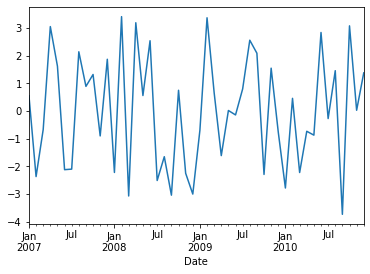

In [45]:
my_data.Error.plot()

In [46]:
my_data.Error.describe()

count    4.800000e+01
mean    -2.146431e-15
std      2.056806e+00
min     -3.735836e+00
25%     -2.107722e+00
50%      1.973422e-02
75%      1.563089e+00
max      3.406688e+00
Name: Error, dtype: float64

<AxesSubplot:>

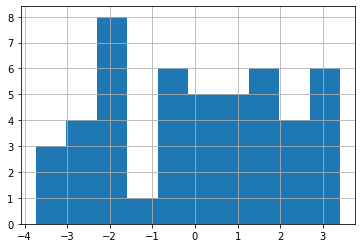

In [47]:
my_data.Error.hist()

<AxesSubplot:ylabel='Density'>

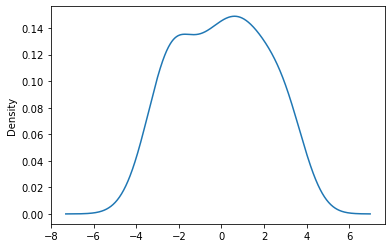

In [48]:
my_data.Error.plot(kind='kde')

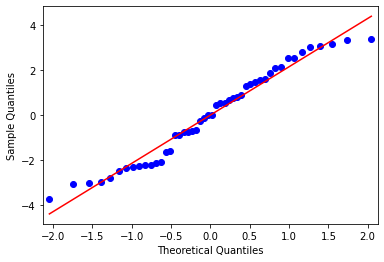

In [49]:
qqplot(my_data.Error, line='r')
plt.show()

In [50]:
d=durbin_watson(my_data.Error)
d

2.4215967803259413

In [51]:
4-d

1.5784032196740587

n=48, K=1, alfa=0.05. Тогда для n=50 и K=1 из таблицы на с.183 Дубровой dl=1.5, du=1.59

Так как dl<4-d<du, то нельзя сделать определенного вывода по имеющимся данным.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

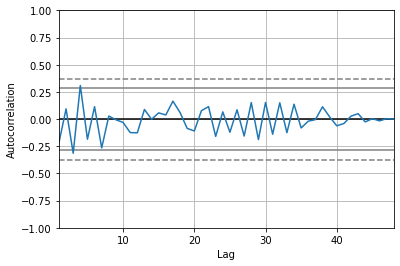

In [52]:
autocorrelation_plot(my_data.Error)

<p><a name="Intervals"></a></p>

# Построение интервального прогноза

$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n-1} $$
-выборочная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [53]:
sigma=scipy.stats.sem(y)
sigma

0.7858586031149843

In [54]:
confidence=0.95
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

2.0117405104757546

In [55]:
t_new = np.arange(len(y) + 1,len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [56]:
t_new=t_new.reshape(-1,1)

In [57]:
y_new=model.predict(t_new) 
y_new

array([43.18616135, 43.54624276, 43.90632418, 44.26640559, 44.62648701,
       44.98656843, 45.34664984, 45.70673126, 46.06681267, 46.42689409,
       46.7869755 , 47.14705692])

In [58]:
y_up=y_new+tstu*sigma
y_up

array([44.76710493, 45.12718635, 45.48726777, 45.84734918, 46.2074306 ,
       46.56751201, 46.92759343, 47.28767484, 47.64775626, 48.00783767,
       48.36791909, 48.72800051])

In [59]:
y_down=y_new-tstu*sigma
y_down

array([41.60521776, 41.96529918, 42.32538059, 42.68546201, 43.04554342,
       43.40562484, 43.76570625, 44.12578767, 44.48586908, 44.8459505 ,
       45.20603192, 45.56611333])

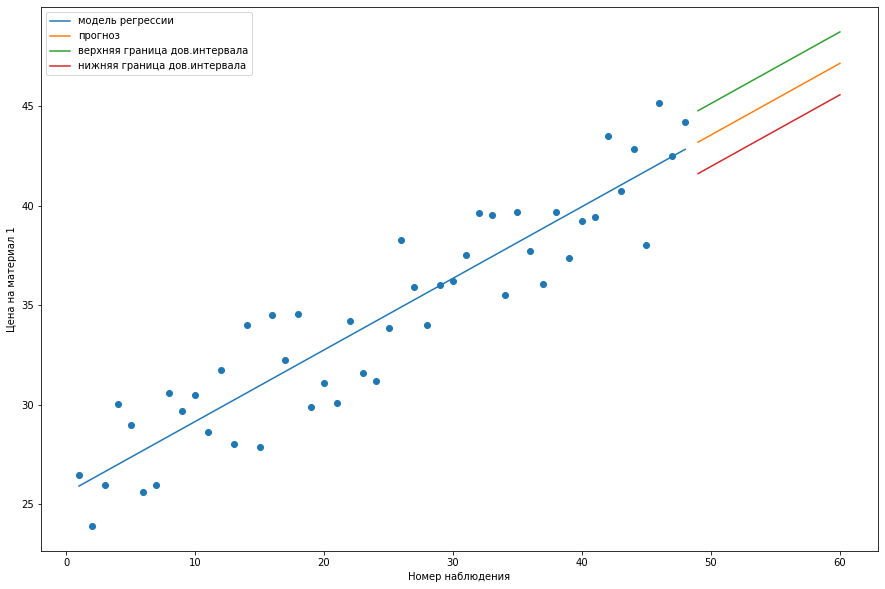

In [60]:
plt.figure(figsize=[15,10])

plt.scatter(t, y)

plt.plot(t,y_pred)
plt.plot(t_new,y_new)
plt.plot(t_new,y_up)
plt.plot(t_new,y_down)

plt.xlabel("Номер наблюдения")
plt.ylabel("Цена на материал 1")
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала' ,\
            'нижняя граница дов.интервала'])

plt.show()